In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
!nohup ollama serve > ollama_serve.log 2>&1 &

In [ ]:
!ollama pull all-minilm
!ollama pull nomic-embed-text
!ollama pull mxbai-embed-large

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest 
pulling 797b70c4edf8...   0% ▕▏    0 B/ 45 MB                  pulling manifest 
pulling 797b70c4edf8...   0% ▕▏    0 B/ 45 MB                  pulling manifest 
pulling 797b70c4edf8...   0% ▕▏    0 B/ 45 MB                  pulling manifest 
pulling 797b70c4edf8...   0% ▕▏    0 B/ 45 MB                  pulling manifest 
pulling 797b70c4edf8...   0% ▕▏    0 B/ 45 MB                  pulling manifest 
pulling 797b70c4edf8...   1% ▕▏ 389 KB/ 45 MB                  pulling manifest 
pulling 797b70c4edf8...  15% ▕▏ 7.1 MB/ 45 MB                  pulling manifest 
pulling 797b70c4edf8...  47% ▕▏  21 MB/ 45 MB                  pulling manifest 
pulling 797b70c4edf8...  79% ▕▏  36 MB/ 45 MB                  pulling manifest 
pullin

In [ ]:
!pip install -qU langchain_community --q
!pip install -qU langchain-ollama --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.7 MB/s eta 0:00:00


In [ ]:
from langchain_ollama import OllamaLLM

llm_all_minilm = OllamaLLM(model="all-minilm") # 23M params
llm_nomic = OllamaLLM(model="nomic-embed-text") # 137M params
llm_mxbai = OllamaLLM(model="mxbai-embed-large") # 334M params

In [ ]:
from langchain_ollama import OllamaEmbeddings

all_minilm_embeddings = OllamaEmbeddings(
    model="all-minilm",
)

nomic_embeddings = OllamaEmbeddings(
    model="nomic-embed-text",
)

mxbai_embeddings = OllamaEmbeddings(
    model="mxbai-embed-large",
)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split

!pip install datasets --q
from datasets import load_dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Step 1: Load the Quora Question Pairs dataset from Hugging Face
dataset = load_dataset('quora-competitions/quora', trust_remote_code=True)
df = pd.DataFrame(dataset['train']).dropna().head(1000)
df = df[['questions', 'is_duplicate']]
df['question1'] = df['questions'].apply(lambda x: x['text'][0])
df['question2'] = df['questions'].apply(lambda x: x['text'][1])
df['is_duplicate'] = df['is_duplicate'].astype(int)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.69k [00:00<?, ?B/s]

quora.py:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/404290 [00:00<?, ? examples/s]

In [ ]:
df.shape

(1000, 4)

In [ ]:
df.head()

,questions,is_duplicate,question1,question2
0,"{'id': [1, 2], 'text': ['What is the step by s...",0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,"{'id': [3, 4], 'text': ['What is the story of ...",0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,"{'id': [5, 6], 'text': ['How can I increase th...",0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,"{'id': [7, 8], 'text': ['Why am I mentally ver...",0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"{'id': [9, 10], 'text': ['Which one dissolve i...",0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [ ]:
df[df['is_duplicate'] == 1].head()

,questions,is_duplicate,question1,question2
5,"{'id': [11, 12], 'text': ['Astrology: I am a C...",1,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan..."
7,"{'id': [15, 16], 'text': ['How can I be a good...",1,How can I be a good geologist?,What should I do to be a great geologist?
11,"{'id': [23, 24], 'text': ['How do I read and f...",1,How do I read and find my YouTube comments?,How can I see all my Youtube comments?
12,"{'id': [25, 26], 'text': ['What can make Physi...",1,What can make Physics easy to learn?,How can you make physics easy to learn?
13,"{'id': [27, 28], 'text': ['What was your first...",1,What was your first sexual experience like?,What was your first sexual experience?


In [ ]:
df[df['is_duplicate'] == 1].shape

(380, 4)

In [ ]:
# Step 2: Define a function for embedding and similarity scoring
def evaluate_embeddings(embedding_model, data, label_column='is_duplicate', normalize=False):
    duplicate_similarities = [] # 620 sims
    non_duplicate_similarities = [] # 380 sims

    for _, row in data.iterrows():
        q1_vector = embedding_model.embed_query(row['question1'])
        q2_vector = embedding_model.embed_query(row['question2'])
        similarity = np.dot(q1_vector, q2_vector) / (np.linalg.norm(q1_vector) * np.linalg.norm(q2_vector))

        # Normalize cosine similarity to [0, 1] if specified
        if normalize:
            similarity = (similarity + 1) / 2

        # Append similarity to the appropriate list
        if row[label_column] == 1:
            duplicate_similarities.append(similarity)
        else:
            non_duplicate_similarities.append(similarity)

    # Evaluate performance
    roc_auc = roc_auc_score(data[label_column], duplicate_similarities + non_duplicate_similarities)
    mse = mean_squared_error(data[label_column], duplicate_similarities + non_duplicate_similarities)

    return roc_auc, mse, duplicate_similarities, non_duplicate_similarities

In [ ]:
# Step 3: Evaluate each embedding model
results = {}
model_similarities = {}
models = {
    "all-minilm": all_minilm_embeddings,
    "nomic-embed-text": nomic_embeddings,
    "mxbai-embed-large": mxbai_embeddings
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    roc_auc, mse, duplicates, non_duplicates = evaluate_embeddings(model, df)
    results[model_name] = {"ROC-AUC": roc_auc, "MSE": mse}
    model_similarities[model_name] = {
        "duplicates": duplicates,
        "non_duplicates": non_duplicates
    }

Evaluating all-minilm...
Evaluating nomic-embed-text...
Evaluating mxbai-embed-large...


In [ ]:
# Display results
results_df = pd.DataFrame.from_dict(results, orient='index')
print("Evaluation Results:")
print(results_df)

Evaluation Results:
                    ROC-AUC       MSE
all-minilm         0.465212  0.404601
nomic-embed-text   0.465106  0.424449
mxbai-embed-large  0.465522  0.412483


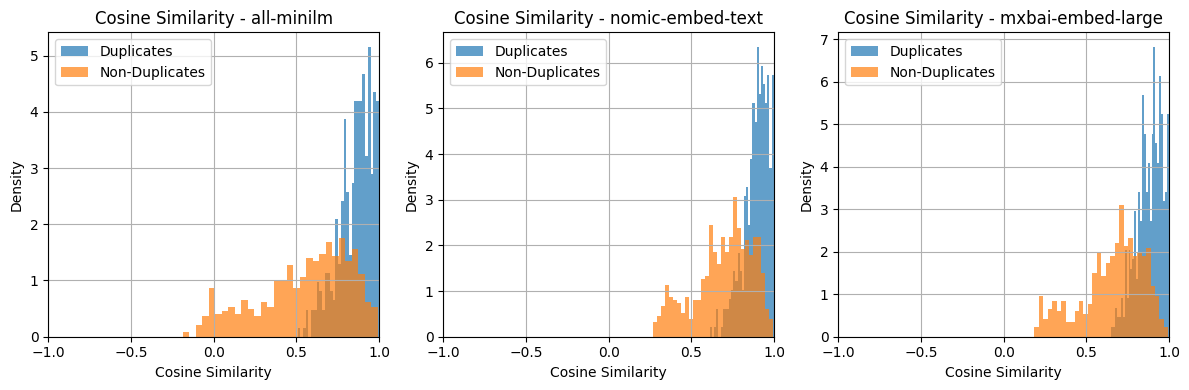

In [ ]:
import matplotlib.pyplot as plt

# Plot distributions
plt.figure(figsize=(12, 4))

for i, (model_name, similarities) in enumerate(model_similarities.items(), 1):
    duplicates = similarities['duplicates']
    non_duplicates = similarities['non_duplicates']

    plt.subplot(1, 3, i)
    plt.hist(duplicates, bins=30, alpha=0.7, label="Duplicates", density=True)
    plt.hist(non_duplicates, bins=30, alpha=0.7, label="Non-Duplicates", density=True)
    plt.title(f"Cosine Similarity - {model_name}")
    plt.xlabel("Cosine Similarity")
    plt.ylabel("Density")
    plt.xlim(-1.0, 1.0)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()